# **Exploratory Data Analysis** 

In [18]:
# Import the neccessary Libraries
import numpy as np
import pandas as pd

# for visulas
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [19]:
# Import and Load dataset
df = pd.read_csv('Dataset/fitness_class_2212.csv')
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [20]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [21]:
# Shape of the data
df.shape

(1500, 8)

In [22]:
# check for missing Values
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [23]:
# Check Column
df.columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [24]:
# Check the data types
df.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before          object
day_of_week          object
time                 object
category             object
attended              int64
dtype: object

In [25]:
!pip install missingno 

<Axes: >

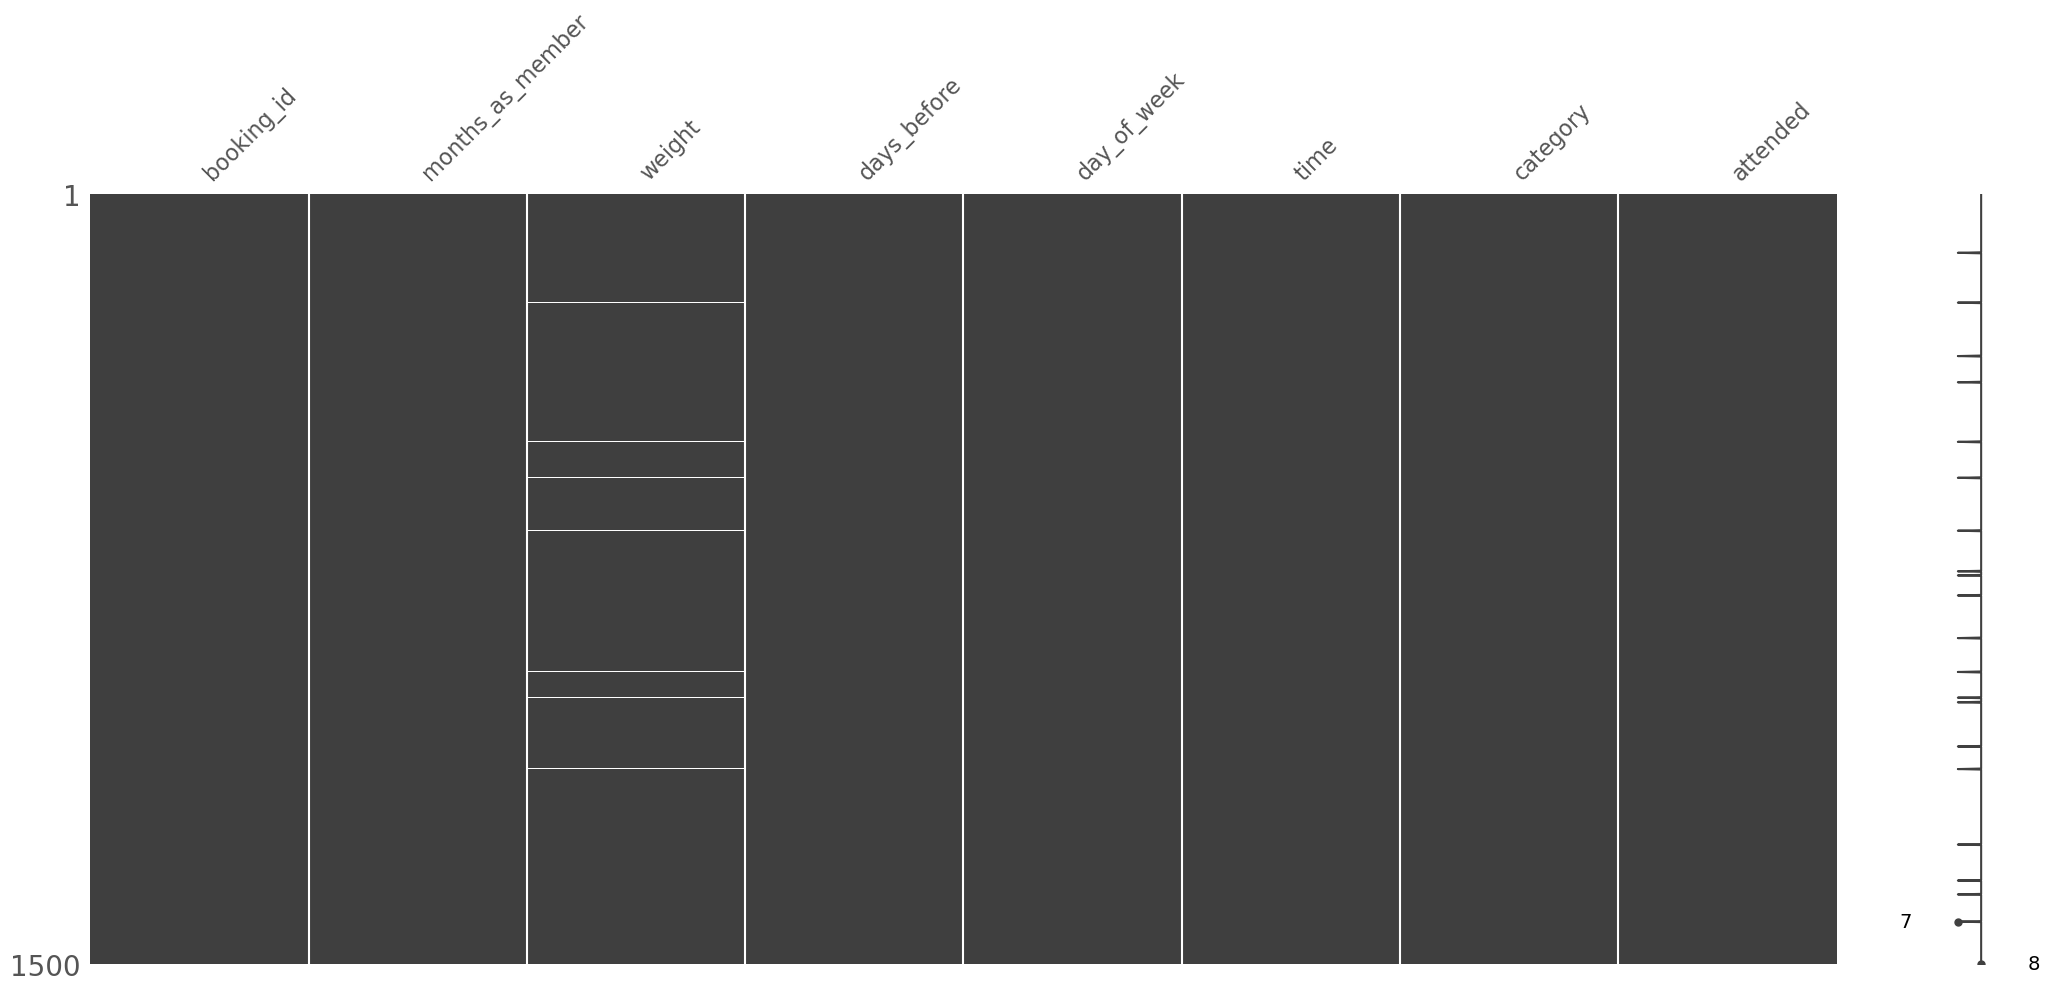

In [26]:
# check the pattern of missingness of data
import missingno as msno

msno.matrix(df)

# Data Validation and Prepocessing


In [27]:
# Select the categorical columns
cat_vars = df.select_dtypes(include = ['category', 'object']).columns.tolist()
print(cat_vars)

['days_before', 'day_of_week', 'time', 'category']


In [28]:
# Loop through all the categorical column 
for column in cat_vars:
    print(df[column].value_counts())

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64
Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
AM    1141
PM     359
Name: time, dtype: int64
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64


In [29]:
# Select the numerical columns
num_vars = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(num_vars)

['booking_id', 'months_as_member', 'weight', 'attended']


In [30]:
# Loop through all the numerical column 
for column in num_vars:
    print(df[column].value_counts())

1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64
8      99
7      93
6      92
9      85
5      80
       ..
60      1
90      1
105     1
62      1
69      1
Name: months_as_member, Length: 72, dtype: int64
78.28    5
84.64    4
75.63    4
76.18    3
69.00    3
        ..
65.01    1
73.09    1
86.22    1
79.44    1
94.39    1
Name: weight, Length: 1241, dtype: int64
0    1046
1     454
Name: attended, dtype: int64


In [31]:
# Remove 'days' from 'days_before' column
df['days_before'] = df['days_before'].str.replace(' days', '')

# Replace '-' in category column with 'uknown'
df['category'] = df['category'].str.replace('-', 'unknown')

# Replace 'day_of_week' values with abbreviated versions
df['day_of_week'] = df['day_of_week'].str.replace('Wednesday', 'Wed')
df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri')
df['day_of_week'] = df['day_of_week'].str.replace('Monday', 'Mon')

# Replace the missing values in 'weight' column with the overall mean
avg_weight = df['weight'].mean().round(2)
df['weight'].fillna(avg_weight, inplace=True)

# check if there is still missing values in 'weight' column
df['weight'].isnull().sum()


C:\Users\USER\AppData\Local\Temp\ipykernel_23684\803509325.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['day_of_week'] = df['day_of_week'].str.replace('Fri.', 'Fri')


0

In [32]:
# Value counts for all columns
df.value_counts()


booking_id  months_as_member  weight  days_before  day_of_week  time  category  attended
1           17                79.56   8            Wed          PM    Strength  0           1
998         11                94.38   4            Tue          PM    HIIT      0           1
1007        4                 97.91   8            Thu          AM    Aqua      0           1
1006        6                 98.25   4            Tue          AM    Cycling   0           1
1005        14                95.60   14           Sun          AM    HIIT      1           1
                                                                                           ..
498         7                 77.92   8            Thu          AM    Cycling   0           1
497         7                 77.96   2            Mon          AM    HIIT      0           1
496         10                89.19   8            Thu          AM    Cycling   0           1
495         4                 89.38   11           Fri          A

In [33]:
# Summary statistics of data
df.describe().astype('int64')

,booking_id,months_as_member,weight,attended
count,1500,1500,1500,1500
mean,750,15,82,0
std,433,12,12,0
min,1,1,55,0
25%,375,8,73,0
50%,750,12,81,0
75%,1125,19,89,1
max,1500,148,170,1


**The table provides statistical information for four variables: booking_id, months_as_member, weight, and attended. Here is a summary of the statistics:**

- booking_id: The dataset contains 1500 booking IDs. The minimum booking ID is 1, and the maximum booking ID is 1500.
- months_as_member: The average number of months as a member is approximately 15, with a standard deviation of 12. The minimum value is 1, and the maximum value is 148.
- weight: The average weight is approximately 82, with a standard deviation of 12. The minimum weight is 55, and the maximum weight is 170.
- attended: This variable represents whether the booking was attended or not. The dataset consists of 1500 entries, with a mean of 0 (indicating not attended). The variable has a minimum value of 0 and a maximum value of 1.

These statistics provide insights into the distribution and characteristics of the variables in the dataset.

## EXploratory Data Analysis
- Univariate Analyis 
- Bivariate Analyis 
- Multivariate Analysis

Univariate Analysis

- We will consider the each of the features and its visualization to check the distribution 

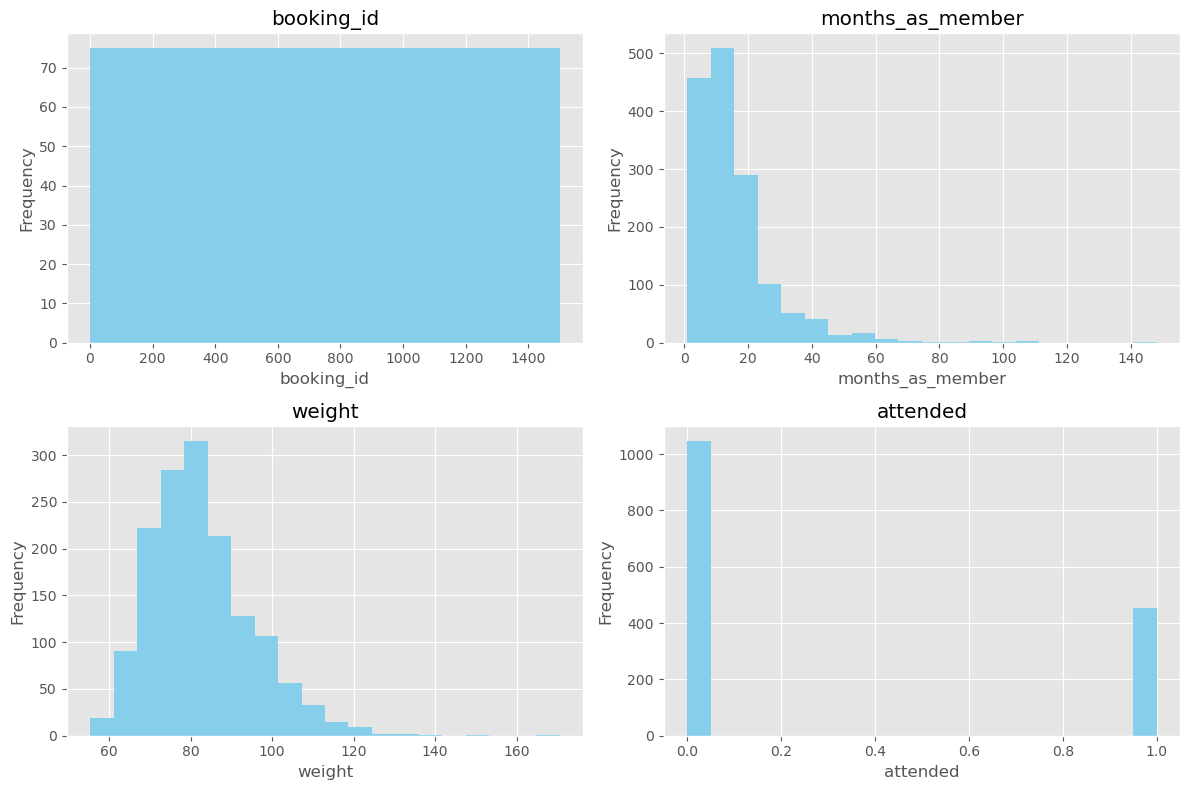

In [34]:
# Select the numerical columns for the subplot
numerical_columns = ['booking_id', 'months_as_member', 'weight', 'attended']

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 2

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through the numerical columns and plot them
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    ax.hist(df[col], bins=20, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

*The number of bookings in the fitness class platform is 1500. The "month_as_member" variable is skewed to the right, indicating that the majority of the members have been with the platform for at least 15 months. In terms of the "weight" column, the majority of members weigh 82 pounds and above. However, there are only two members who weigh between 140 and 170 pounds, respectively. Additionally, there are more people who do not attend the fitness classes compared to those who do attend.*

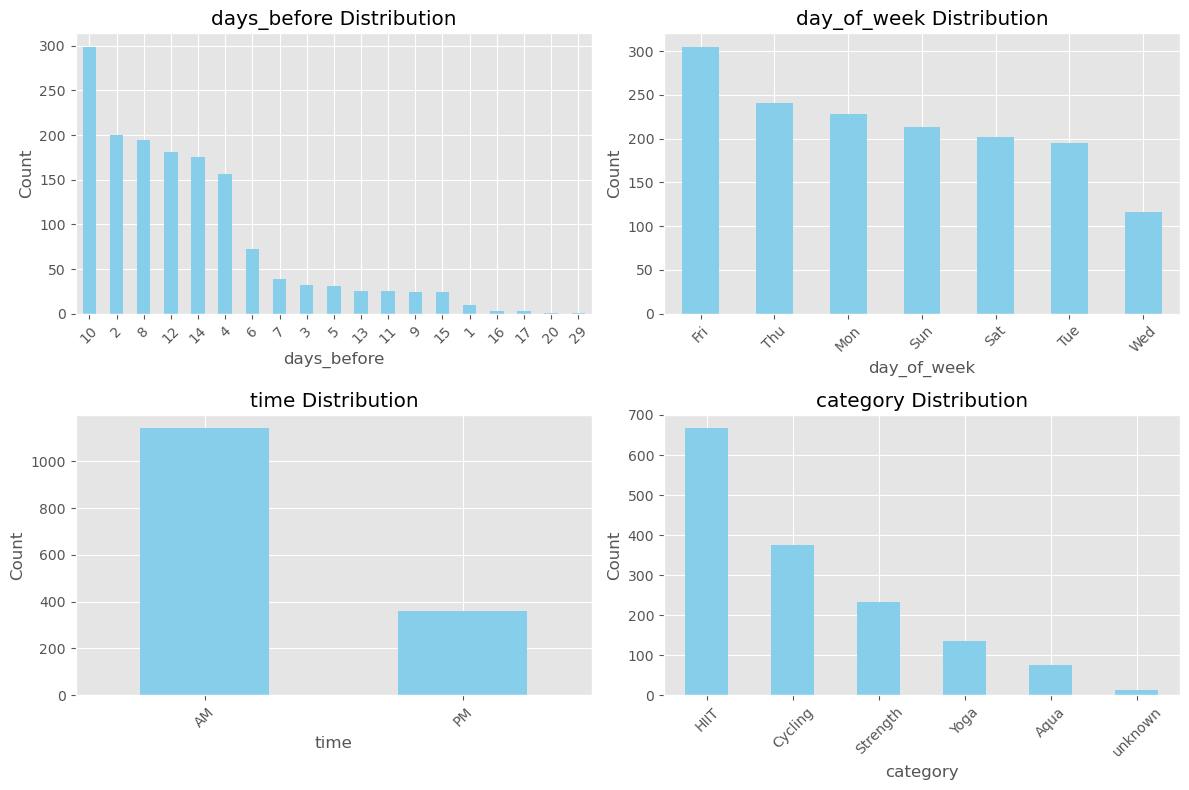

In [35]:
# Select the categorical columns for the subplot
categorical_columns = ['days_before', 'day_of_week', 'time', 'category']

# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 2

# Create a subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the 2D axes array for easier indexing
axes = axes.flatten()

# Loop through the categorical columns and plot them
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'{col} Distribution')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Here are some insights:**

**Days Before Distribution:**

The highest frequency of events or actions occurs roughly 10 days before a particular date or deadline.
The frequency then decreases gradually as we approach the said date or deadline.
Very few events occur close to the day of interest, with a notable dip around the 20-25 day range.

**Day of the Week Distribution:**

Friday appears to be the most popular or busiest day, with the highest count.
Wednesday has the least number of events or actions among the days of the week.
The activity level seems to be relatively consistent from Thursday to Tuesday, with slight variations.


**Time Distribution:**

A vast majority of events or actions happen during the AM (morning) hours.
The frequency in the PM (afternoon/evening) is significantly less than that of the AM.


**Category Distribution:**

HIIT (High-Intensity Interval Training) is the most popular category, with the highest count.
Yoga and Aqua have relatively low counts, indicating they might be less popular or less frequently conducted.
There's a category labeled 'Unknown' which suggests that some data points don't have a clear category associated with them or it wasn't recorded.
In summary, it appears that most events or actions are concentrated around 10 days before a certain date, mostly happen on Fridays and in the mornings, and HIIT sessions are the most popular category.






In [48]:
df.head(5)


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [41]:
attendance_by_category = df.groupby('category')['attended'].sum()

print(attendance_by_category)


category
Aqua         25
Cycling     110
HIIT        213
Strength     62
Yoga         42
unknown       2
Name: attended, dtype: int64


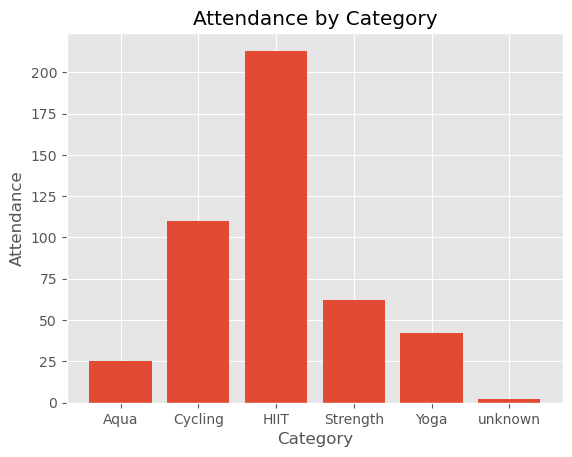

In [50]:
attendance_by_category = df.groupby('category')['attended'].sum()
plt.bar(attendance_by_category.index, attendance_by_category.values)
plt.xlabel('Category')
plt.ylabel('Attendance')
plt.title('Attendance by Category')
plt.show()

In [49]:
category_attendance_counts = df.groupby(['category', 'attended']).count()['booking_id']

print(category_attendance_counts)

category  attended
Aqua      0            51
          1            25
Cycling   0           266
          1           110
HIIT      0           454
          1           213
Strength  0           171
          1            62
Yoga      0            93
          1            42
unknown   0            11
          1             2
Name: booking_id, dtype: int64


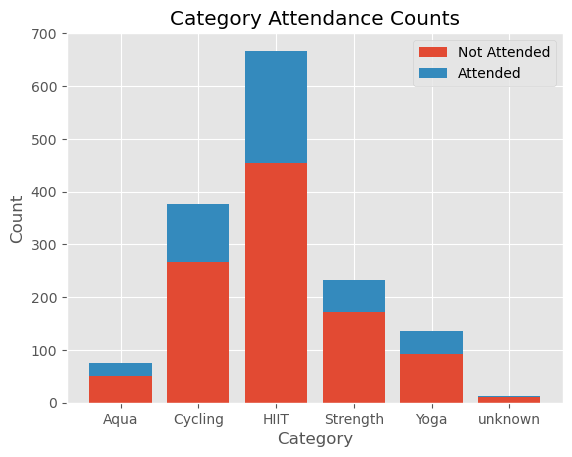

In [51]:
category_attendance_counts = df.groupby(['category', 'attended']).count()['booking_id']

# Reshape the data for plotting
data = category_attendance_counts.unstack()
categories = data.index
attendance = [data[0], data[1]]
plt.bar(categories, attendance[0], label='Not Attended')
plt.bar(categories, attendance[1], bottom=attendance[0], label='Attended')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Attendance Counts')
plt.legend()
plt.show()


In [53]:
correlation = df['weight'].corr(df['attended'])

print(f"Correlation between weight and attendance: {correlation}")



Correlation between weight and attendance: -0.2835213591433109


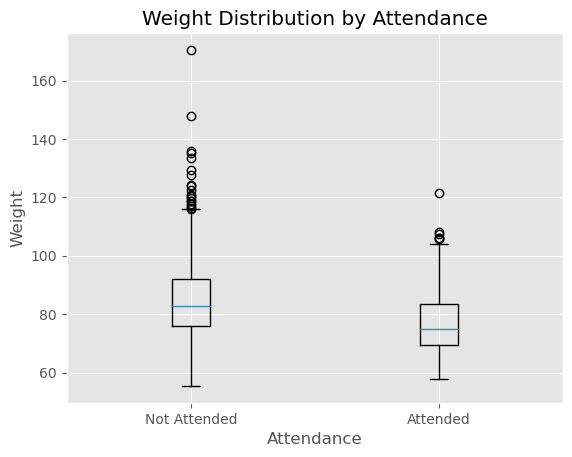

In [55]:
plt.boxplot([df[df['attended'] == 0]['weight'], df[df['attended'] == 1]['weight']])
plt.xticks([1, 2], ['Not Attended', 'Attended'])
plt.xlabel('Attendance')
plt.ylabel('Weight')
plt.title('Weight Distribution by Attendance')
plt.show()



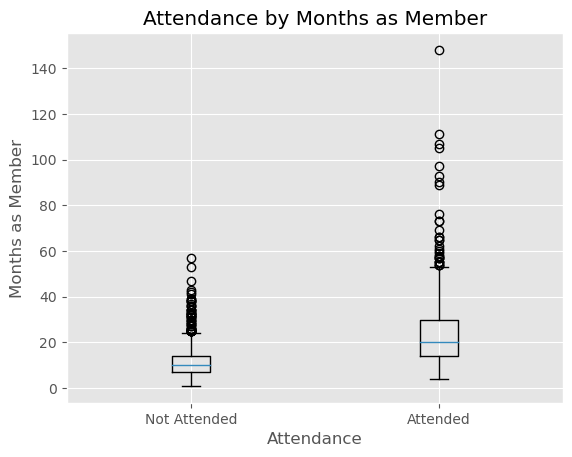

In [62]:

plt.boxplot([df[df['attended'] == 0]['months_as_member'], df[df['attended'] == 1]['months_as_member']])
plt.xticks([1, 2], ['Not Attended', 'Attended'])
plt.xlabel('Attendance')
plt.ylabel('Months as Member')
plt.title('Attendance by Months as Member')
plt.show()
